# 🔥 Forest Fire Prediction Model Training
## 📊 Data Analysis and Machine Learning Pipeline

This notebook demonstrates the complete process of training a machine learning model to predict Forest Fire Weather Index (FWI) using various environmental parameters.

### 🎯 Objectives:
- Data preprocessing and feature engineering
- Correlation analysis and feature selection
- Model training and evaluation
- Performance comparison of different models
- Model persistence for future use

In [1]:
# Essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 📥 Loading the Dataset
Let's load our cleaned Algerian Forest Fires dataset.

In [2]:
# Load the cleaned dataset
df = pd.read_csv(r'D:\projects\forest-fire-jul\data\Algerian_forest_fires_cleaned_dataset.csv')

## 🔍 Data Exploration
Let's examine the first few rows of our dataset to understand its structure.

In [3]:
# Display first 5 rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## 🛠️ Feature Engineering
We'll remove temporal features (day, month, year) as they don't contribute to the FWI prediction.

In [4]:
# Remove temporal features
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## 🔄 Target Variable Encoding
Converting the 'Classes' column to binary values (0 for 'not fire', 1 for 'fire').

In [5]:
# Encode target variable
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## 🎯 Feature Selection
Separating features (X) and target variable (y).

In [6]:
# Split features and target
X = df.drop('FWI', axis=1)
y = df['FWI']

## 📊 Train-Test Split
Splitting the data into training and testing sets (75% training, 25% testing).

In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (182, 11)
Testing set shape: (61, 11)


## 📈 Correlation Analysis
Analyzing feature correlations to identify multicollinearity.

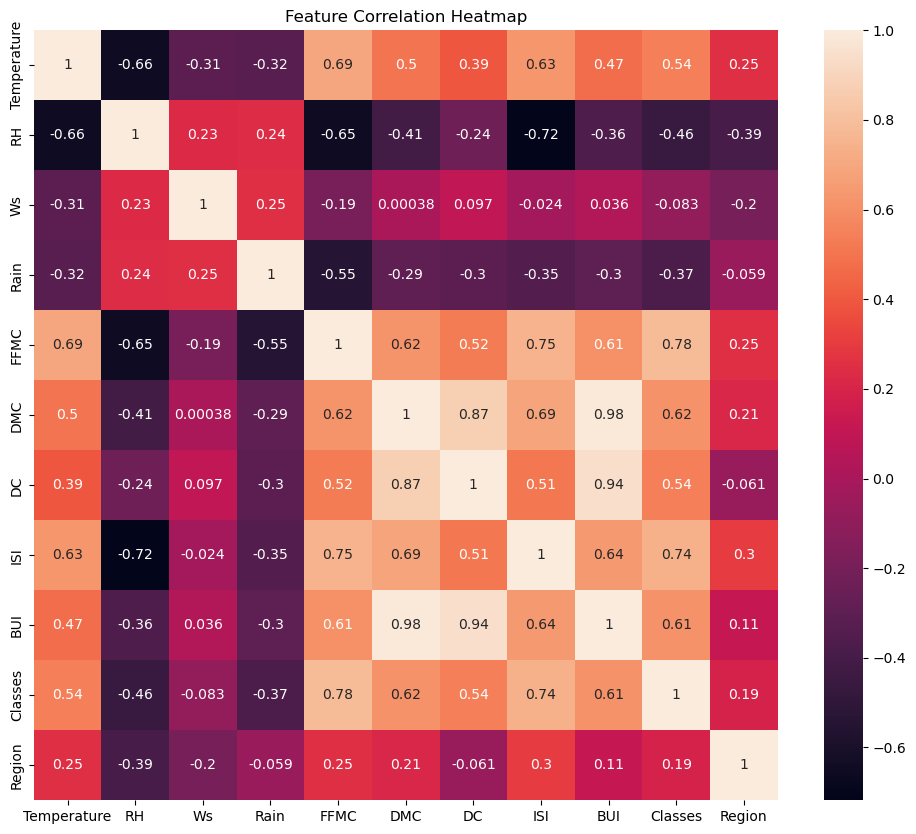

In [8]:
# Create correlation heatmap
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

## 🎯 Feature Selection Based on Correlation
Removing highly correlated features to reduce multicollinearity.

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# Remove highly correlated features
corr_features = correlation(X_train, 0.85)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

# Reorder columns for consistency
expected_feature_order = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes', 'Region']
X_train = X_train[expected_feature_order]
X_test = X_test[expected_feature_order]

## 📏 Feature Scaling
Standardizing features to ensure consistent scale across all variables.

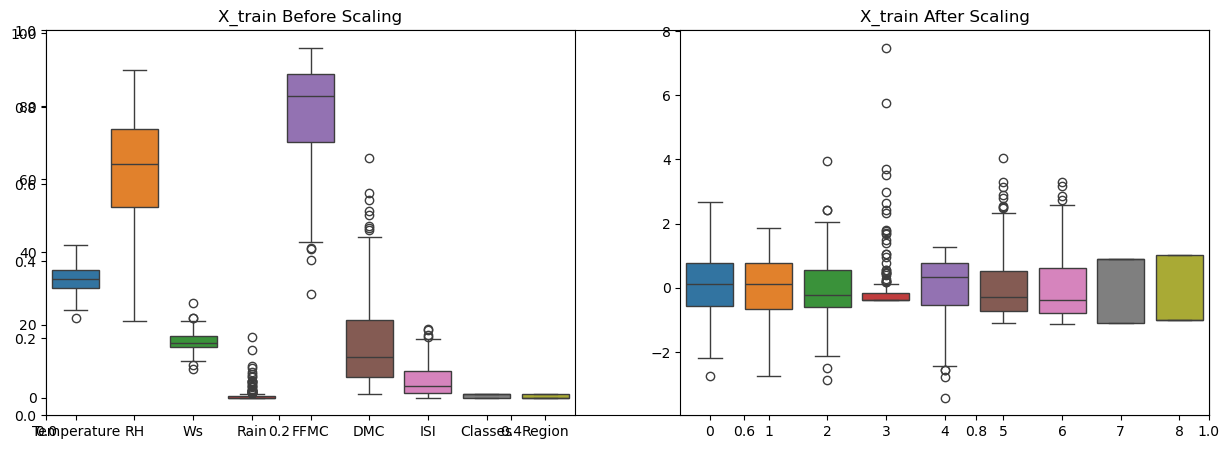

In [10]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the effect of scaling
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## 📊 Model Training 

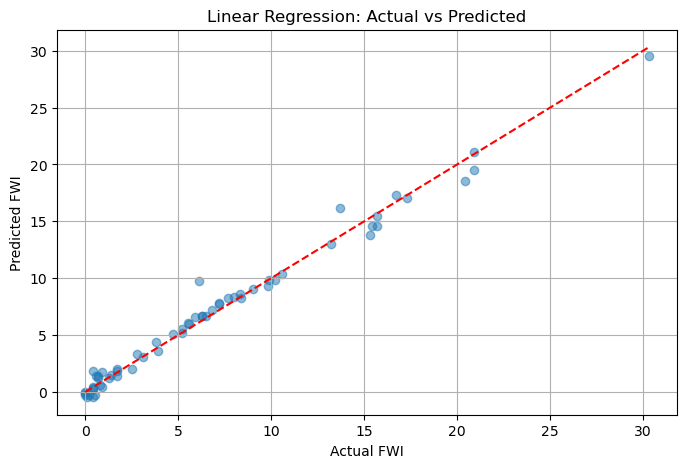

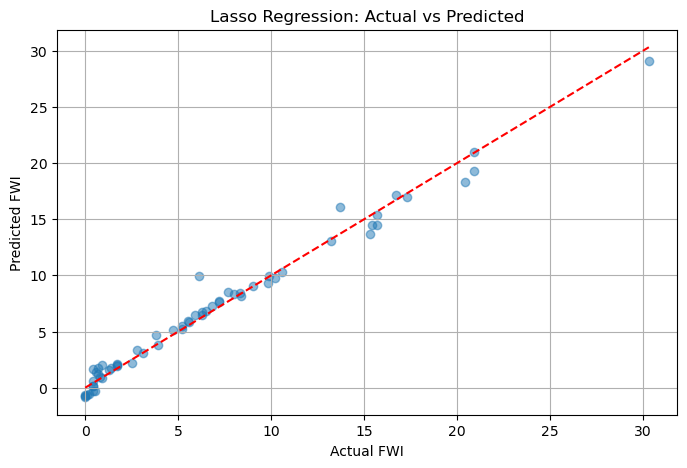

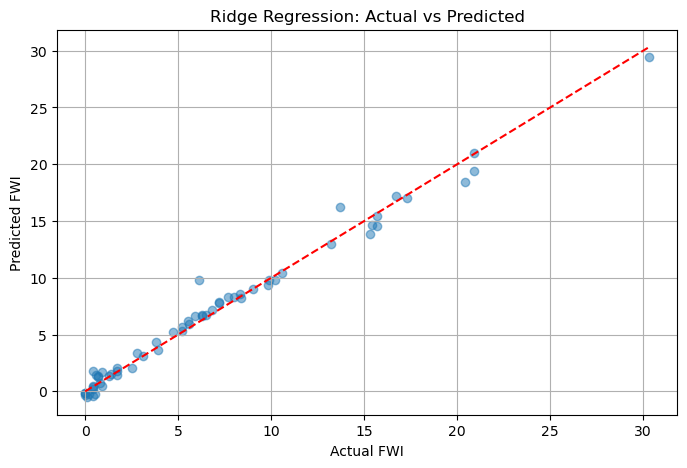

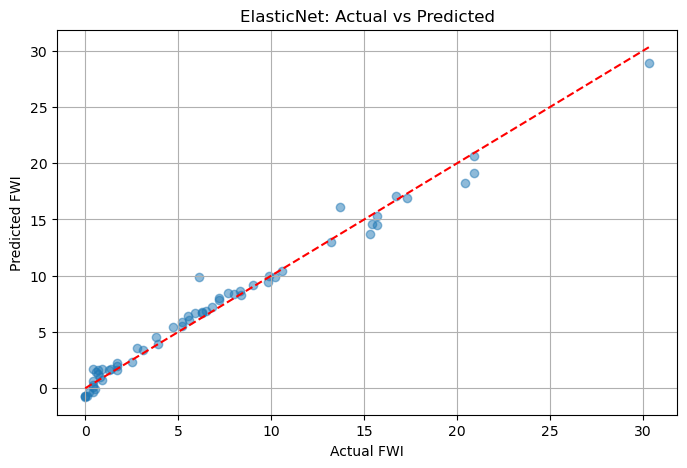

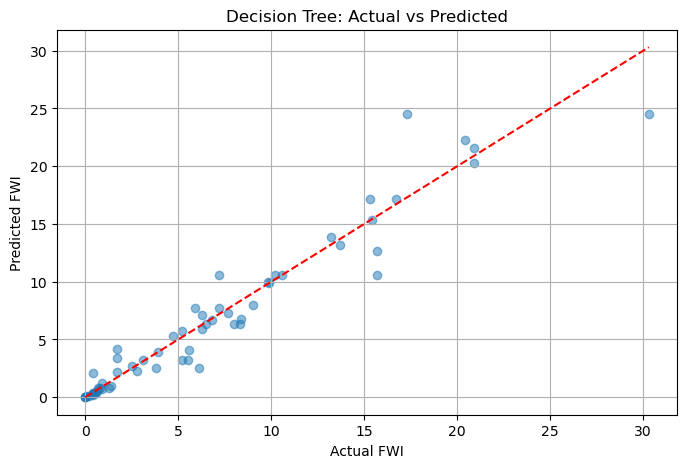

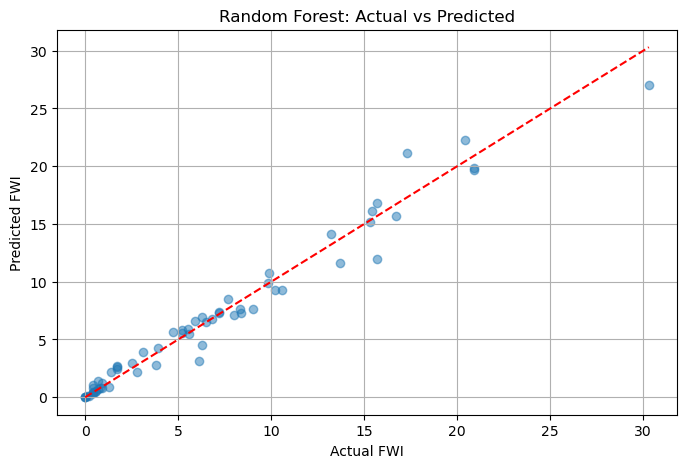

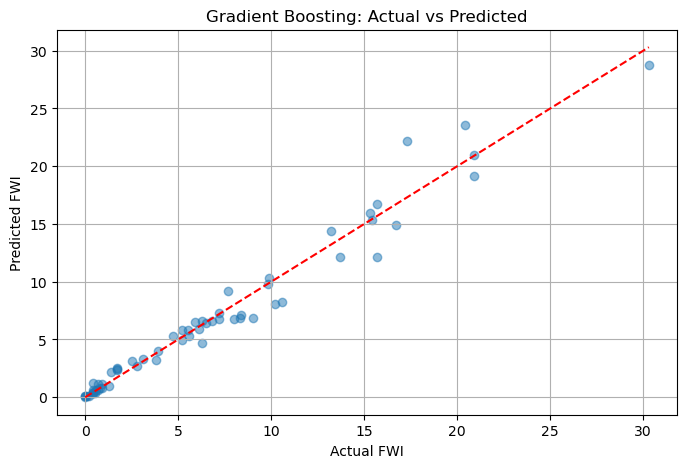


--- Model Performance Metrics ---


,MAE,MSE,RMSE,R2 Score,Explained Variance
Linear Regression,0.546800,0.674300,0.821100,0.984800,0.984900
Lasso Regression,0.620000,0.792500,0.890200,0.982100,0.982200
Ridge Regression,0.564200,0.694900,0.833600,0.984300,0.984500
ElasticNet,0.657600,0.822300,0.906800,0.981400,0.981700
Decision Tree,1.045900,3.218400,1.794000,0.927300,0.927600
Random Forest,0.776200,1.360500,1.166400,0.969300,0.969400
Gradient Boosting,0.770100,1.515500,1.231100,0.965800,0.965800


In [11]:
# 📦 Imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2 Score": r2_score(y_true, y_pred),
        "Explained Variance": explained_variance_score(y_true, y_pred)
    }

# ✅ Model registry
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": LassoCV(cv=5),
    "Ridge Regression": RidgeCV(cv=5),
    "ElasticNet": ElasticNetCV(cv=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


# 📊 Training & evaluation
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = evaluate_model(y_test, y_pred)

    # 🔍 Visualize all models
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}: Actual vs Predicted")
    plt.xlabel("Actual FWI")
    plt.ylabel("Predicted FWI")
    plt.grid(True)
    plt.show()

# 📊 Metrics DataFrame
metrics_df = pd.DataFrame(results).T.round(4)

# 🖍️ Conditional highlighting function
def highlight_best_value_in_column(s):
    """
    Highlights the best value in a pandas Series (column) based on the metric type.
    MAE, MSE, RMSE are highlighted for minimum values.
    R2 Score, Explained Variance are highlighted for maximum values.
    """
    metric_name = s.name # Get the column name (e.g., 'MAE', 'R2 Score')
    styles = [''] * len(s) # Initialize all cells in the column to no style

    if metric_name in ['MAE', 'MSE', 'RMSE']:
        # For error metrics, the minimum value is best
        best_val = s.min()
        # Find all occurrences of the best value
        for i, val in enumerate(s):
            if val == best_val:
                styles[i] = 'background-color: lightgreen'
    else: # R2 Score, Explained Variance
        # For score metrics, the maximum value is best
        best_val = s.max()
        # Find all occurrences of the best value
        for i, val in enumerate(s):
            if val == best_val:
                styles[i] = 'background-color: lightgreen'
    return styles

# Apply style per column based on metric type
# The .apply() method with axis=0 applies the function to each column (Series)
styled_df = metrics_df.style.apply(highlight_best_value_in_column, axis=0)


# 💡 Display styled table
print("\n--- Model Performance Metrics ---")
display(styled_df)


## 💾 Model and Scaler 
Saving the trained model and scaler for future use in predictions.

In [13]:
import joblib
import os

# Create directory if not exists
if not os.path.exists('models'):
    os.makedirs('models')

# Save the scaler used with Linear Regression
lin_scaler_path = 'models/scaler.pkl'
joblib.dump(scaler, lin_scaler_path)
print(f"Scaler saved to {lin_scaler_path}")

# Save the Linear Regression model
linreg_model_path = 'models/linear_regression_model.pkl'
joblib.dump(models["Linear Regression"], linreg_model_path)
print(f"Linear Regression model saved to {linreg_model_path}")


Scaler saved to models/scaler.pkl
Linear Regression model saved to models/linear_regression_model.pkl
